In [2]:
import numpy as np
import pandas as pd
from astropy.io import votable
import matplotlib.pyplot as plt

In [3]:
csc21=pd.read_csv("/Users/kciurleo/Documents/kciurleo/AGN/csvs/CSC2.1p_OIR_SDSSspecmatch.csv")

/var/folders/6x/hz5y30457mqg1y9dl2fg7r5m00034d/T/ipykernel_2172/1910351754.py:1: DtypeWarning: Columns (57,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  csc21=pd.read_csv("/Users/kciurleo/Documents/kciurleo/AGN/csvs/CSC2.1p_OIR_SDSSspecmatch.csv")


In [4]:
erosita = votable.parse_single_table('/Users/kciurleo/Documents/kciurleo/AGN/csvs/upper_limits.vot').to_table().to_pandas()

In [5]:
seyferts = pd.read_csv("/Users/kciurleo/Documents/kciurleo/AGN/csvs/seyferts.csv")

In [6]:
full_data=pd.merge(seyferts, erosita, on=['PLATE','FIBERID','MJD'], how='left')

In [7]:
np.min(full_data['Exposure_02e'])

59.093502044677734

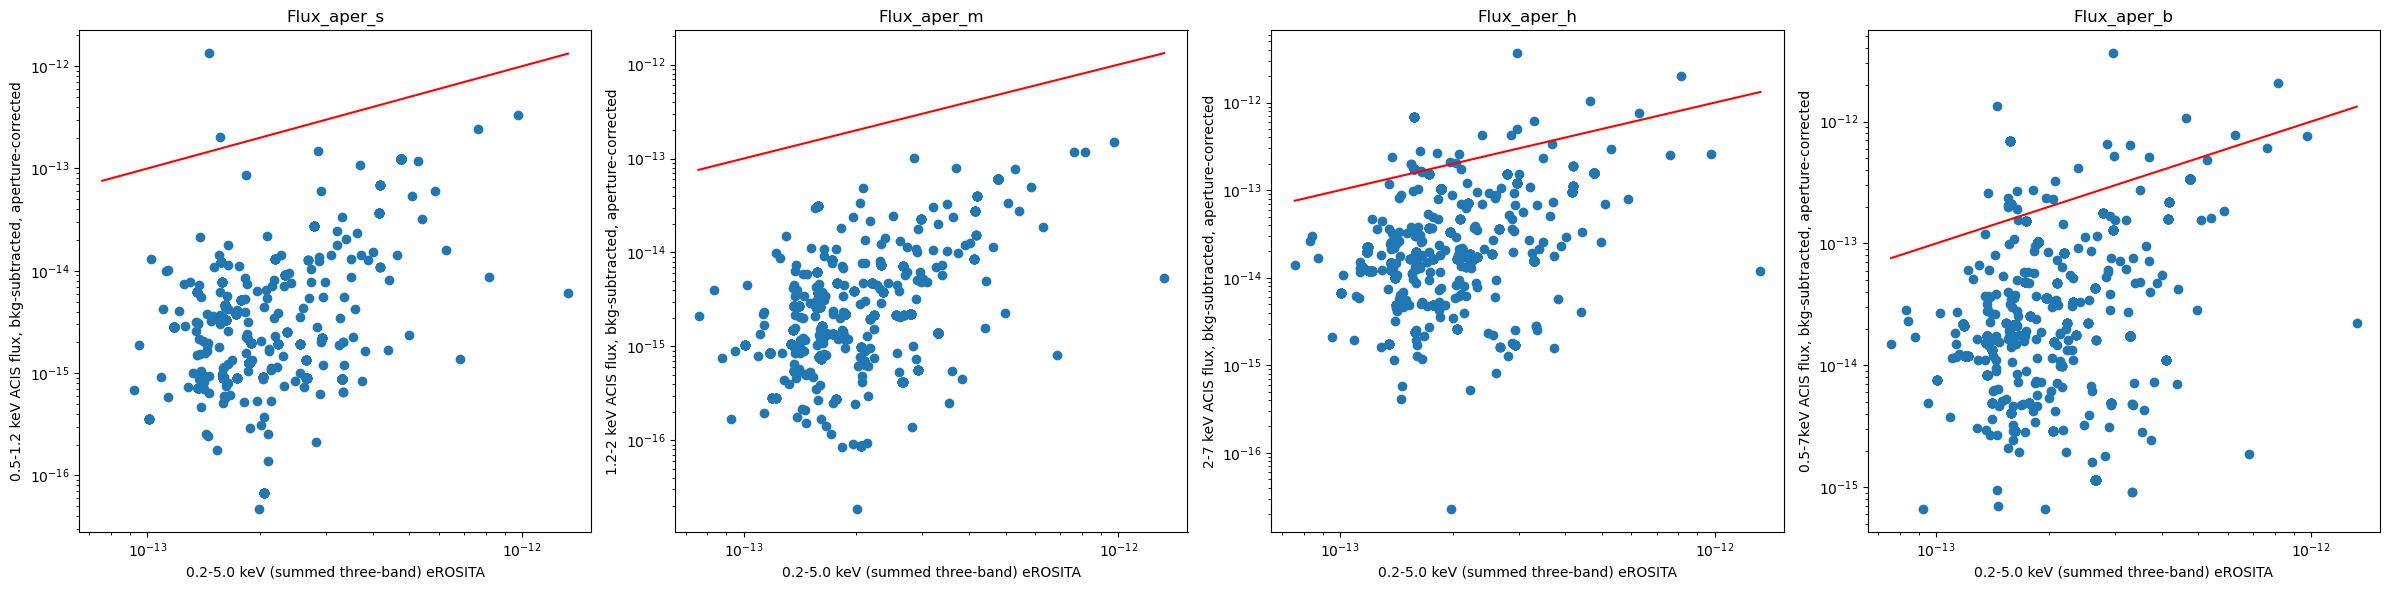

In [9]:
#plotting sum of eROSITA flux vs CSC flux; below the line is below the threshold
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

#flux_aper_s, underestimate
ax1.scatter(full_data['UL_B_02e'], full_data['flux_aper_s'])
#y=x line
ax1.plot(np.linspace(np.min(full_data['UL_B_02e']), np.max(full_data['UL_B_02e'])),
         np.linspace(np.min(full_data['UL_B_02e']), np.max(full_data['UL_B_02e'])), color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('0.2-5.0 keV (summed three-band) eROSITA')
ax1.set_ylabel('0.5-1.2 keV ACIS flux, bkg-subtracted, aperture-corrected')
ax1.set_title('Flux_aper_s')


#flux_aper_m, underestimate
ax2.scatter(full_data['UL_B_02e'], full_data['flux_aper_m'])
#y=x line
ax2.plot(np.linspace(np.min(full_data['UL_B_02e']), np.max(full_data['UL_B_02e'])),
         np.linspace(np.min(full_data['UL_B_02e']), np.max(full_data['UL_B_02e'])), color='red')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('0.2-5.0 keV (summed three-band) eROSITA')
ax2.set_ylabel('1.2-2 keV ACIS flux, bkg-subtracted, aperture-corrected')
ax2.set_title('Flux_aper_m')

#flux_aper_h, underestimate
ax3.scatter(full_data['UL_B_02e'], full_data['flux_aper_h'])
#y=x line
ax3.plot(np.linspace(np.min(full_data['UL_B_02e']), np.max(full_data['UL_B_02e'])),
         np.linspace(np.min(full_data['UL_B_02e']), np.max(full_data['UL_B_02e'])), color='red')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel('0.2-5.0 keV (summed three-band) eROSITA')
ax3.set_ylabel('2-7 keV ACIS flux, bkg-subtracted, aperture-corrected')
ax3.set_title('Flux_aper_h')

#flux_aper_b, overestimate
ax4.scatter(full_data['UL_B_02e'], full_data['flux_aper_b'])
#y=x line
ax4.plot(np.linspace(np.min(full_data['UL_B_02e']), np.max(full_data['UL_B_02e'])),
         np.linspace(np.min(full_data['UL_B_02e']), np.max(full_data['UL_B_02e'])), color='red')
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_xlabel('0.2-5.0 keV (summed three-band) eROSITA')
ax4.set_ylabel('0.5-7keV ACIS flux, bkg-subtracted, aperture-corrected')
ax4.set_title('Flux_aper_b')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [25]:
'''
Chandra fluxes, erg cm-2 s−1

flux_aper_b D 0.5-7keV ACIS flux, bkg-subtracted, aperture-corrected
flux_aper_h D 2-7 keV ACIS flux, bkg-subtracted, aperture-corrected
flux_aper_m D 1.2-2 keV ACIS flux, bkg-subtracted, aperture-corrected
flux_aper_s D 0.5-1.2 keV ACIS flux, bkg-subtracted, aperture-corrected
flux_aper_w D 0.1-10 keV HRC flux, bkg-subtracted, aperture-corrected

_lolim_x and _hilim_x are the 68% confidence limits for band x
'''

###
# Erosita fluxes, in  erg s−1 cm−2
# Band of interest, with:
# 0.2-0.6 keV (soft): 021
# 0.6-2.3 keV (medium): 022
# 2.3-5.0 keV (hard): 023
# 0.2-5.0 keV (summed three-band): 02e
###

''

In [10]:
cone_search=pd.read_csv("/Users/kciurleo/Documents/kciurleo/AGN/csvs/topcat_erosita.csv")

(array([9., 0., 0., 0., 1., 3., 1., 0., 0., 4.]),
 array([6.03319424e-05, 1.05773595e-04, 1.51215248e-04, 1.96656901e-04,
        2.42098554e-04, 2.87540207e-04, 3.32981860e-04, 3.78423512e-04,
        4.23865165e-04, 4.69306818e-04, 5.14748471e-04]),
 <BarContainer object of 10 artists>)

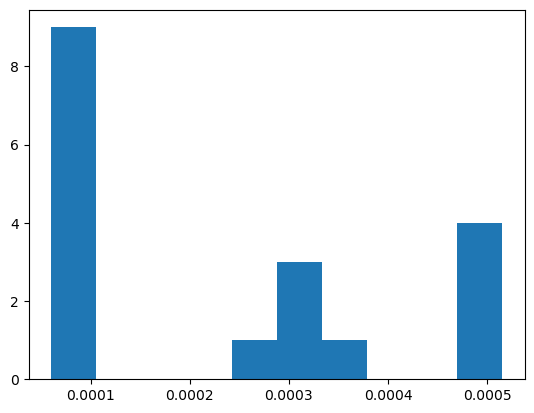

In [11]:
plt.hist(cone_search['Separation'])

In [25]:
#Compton thick search, overestimate because this is 2-7 and F_X is 2-10keV
full_data.loc[full_data['flux_aper_h']/full_data['Flux_OIII_5006']<1]

,CSC21P_name,ra_x,dec_x,likelihood_class,extent_flag,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,flux_aper_b,...,Flag_pos_023,UL_B_023,UL_S_023,Exposure_02e,Flag_pos_02e,UL_B_02e,UL_S_02e,ra,dec,IAUstripped
0,2CXO J000002.2+003739,0.009498,0.627583,TRUE,False,1.798867,1.079022,107.781279,4.000000,2.624562e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009498,0.627583,J000002.2+003739
1,2CXO J000004.7+004654,0.019778,0.781756,TRUE,False,0.945077,0.882179,42.936712,5.142857,2.481202e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019778,0.781756,J000004.7+004654
2,2CXO J000111.1-100155,0.296487,-10.032184,TRUE,False,0.738174,0.730364,95.067257,4.125000,8.052680e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.296487,-10.032184,J000111.1-100155
3,2CXO J000547.5-000116,1.448048,-0.021204,TRUE,False,2.074689,1.179905,18.380538,3.352941,1.455915e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.448048,-0.021204,J000547.5-000116
4,2CXO J000737.3+020247,1.905625,2.046459,TRUE,False,1.997384,1.358077,155.522196,2.631579,1.192739e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.905625,2.046459,J000737.3+020247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,2CXO J235701.1+230416,359.254586,23.071207,TRUE,False,1.140458,0.983308,134.241927,7.191658,8.607331e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.254586,23.071207,J235701.1+230416
2755,2CXO J235707.4-005711,359.281264,-0.953223,TRUE,False,0.973973,0.857201,75.739775,5.548387,2.635144e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.281264,-0.953223,J235707.4-005711
2756,2CXO J235720.1-005829,359.333916,-0.974908,TRUE,False,0.810391,0.755359,81.777545,16.170926,8.609062e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.333916,-0.974908,J235720.1-005829
2757,2CXO J235735.2+004901,359.396726,0.817208,TRUE,False,0.818117,0.748373,156.500651,4.833333,5.186270e-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.396726,0.817208,J235735.2+004901


In [28]:
#Compton thick search, underestimate because this is .1-10 and F_X is 2-10keV
full_data.loc[full_data['flux_aper_w']/full_data['Flux_OIII_5006']<1]

,CSC21P_name,ra_x,dec_x,likelihood_class,extent_flag,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,flux_aper_b,...,Flag_pos_023,UL_B_023,UL_S_023,Exposure_02e,Flag_pos_02e,UL_B_02e,UL_S_02e,ra,dec,IAUstripped
901,2CXO J105048.1+572521,162.700632,57.422593,TRUE,False,1.127475,1.127462,0.000000,3.200000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.700632,57.422593,J105048.1+572521
1207,2CXO J121010.6+392301,182.544449,39.383662,TRUE,False,1.647866,1.263001,117.600933,2.756757,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.544449,39.383662,J121010.6+392301
1220,2CXO J121807.1+295611,184.529787,29.936506,TRUE,False,6.857362,4.809099,57.621791,2.883721,NaN,...,0.0,1.232488e-12,1.232488e-12,77.767288,0.0,1.436267e-13,1.436267e-13,184.529787,29.936506,J121807.1+295611
1221,2CXO J121807.1+295611,184.529787,29.936506,TRUE,False,6.857362,4.809099,57.621791,2.883721,NaN,...,0.0,1.232488e-12,1.232488e-12,77.767288,0.0,1.436267e-13,1.436267e-13,184.529787,29.936506,J121807.1+295611
1222,2CXO J121807.1+295611,184.529787,29.936506,TRUE,False,6.857362,4.809099,57.621791,2.883721,NaN,...,0.0,1.232488e-12,1.232488e-12,77.767288,0.0,1.436267e-13,1.436267e-13,184.529787,29.936506,J121807.1+295611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,2CXO J121807.1+295611,184.529787,29.936506,TRUE,False,6.857362,4.809099,57.621791,2.883721,NaN,...,0.0,1.232488e-12,1.232488e-12,77.767288,0.0,1.436267e-13,1.436267e-13,184.529787,29.936506,J121807.1+295611
1297,2CXO J121807.1+295611,184.529787,29.936506,TRUE,False,6.857362,4.809099,57.621791,2.883721,NaN,...,0.0,1.232488e-12,1.232488e-12,77.767288,0.0,1.436267e-13,1.436267e-13,184.529787,29.936506,J121807.1+295611
1298,2CXO J121807.1+295611,184.529787,29.936506,TRUE,False,6.857362,4.809099,57.621791,2.883721,NaN,...,0.0,1.232488e-12,1.232488e-12,77.767288,0.0,1.436267e-13,1.436267e-13,184.529787,29.936506,J121807.1+295611
1299,2CXO J121807.1+295611,184.529787,29.936506,TRUE,False,6.857362,4.809099,57.621791,2.883721,NaN,...,0.0,1.232488e-12,1.232488e-12,77.767288,0.0,1.436267e-13,1.436267e-13,184.529787,29.936506,J121807.1+295611
